In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

## read flyai data for vision task

In [3]:
path_root = Path('../vision/MalariaCellImages_FlyAI/')
path_train = path_root/'data/local/train'
path_test = path_root/'data/local/test'
path_train.ls(),path_test.ls()

([PosixPath('../vision/MalariaCellImages_FlyAI/data/local/train/train.csv'),
  PosixPath('../vision/MalariaCellImages_FlyAI/data/local/train/images'),
  PosixPath('../vision/MalariaCellImages_FlyAI/data/local/train/models')],
 [PosixPath('../vision/MalariaCellImages_FlyAI/data/local/test/test.csv'),
  PosixPath('../vision/MalariaCellImages_FlyAI/data/local/test/images')])

In [4]:
trn_csv = pd.read_csv(path_train/'train.csv')
val_csv = pd.read_csv(path_test/'test.csv')
trn_csv.head(),val_csv.head()

(                                          image_path  label
 0  images/C143P104ThinF_IMG_20151005_225528_cell_...      0
 1  images/C176P137NThinF_IMG_20151201_120845_cell...      1
 2  images/C177P138NThinF_IMG_20151201_143546_cell...      1
 3  images/C88P49ThinF_IMG_20150820_151451_cell_15...      0
 4  images/C143P104ThinF_IMG_20151005_225413_cell_...      0,
                                           image_path  label
 0  images/C89P50ThinF_IMG_20150820_163728_cell_11...      0
 1  images/C48P9thinF_IMG_20150721_160944_cell_224...      1
 2  images/C129P90ThinF_IMG_20151004_134700_cell_1...      1
 3  images/C76P37ThinF_IMG_20150815_171454_cell_88...      0
 4  images/C70P31_ThinF_IMG_20150813_131330_cell_8...      1)

In [5]:
data=ImageDataBunch.from_df(path=path_train,df=trn_csv,ds_tfms=get_transforms(),size=224,bs=64,valid_pct=0).normalize(imagenet_stats)
data_val=ImageDataBunch.from_df(path=path_test,df=val_csv,ds_tfms=get_transforms(),size=224,bs=64,valid_pct=0).normalize(imagenet_stats)
data.valid_dl= data_val.train_dl
data

ImageDataBunch;

Train: LabelList (16534 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,1,0,0
Path: ../vision/MalariaCellImages_FlyAI/data/local/train;

Valid: LabelList (5512 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0,1,1,0,1
Path: ../vision/MalariaCellImages_FlyAI/data/local/test;

Test: None

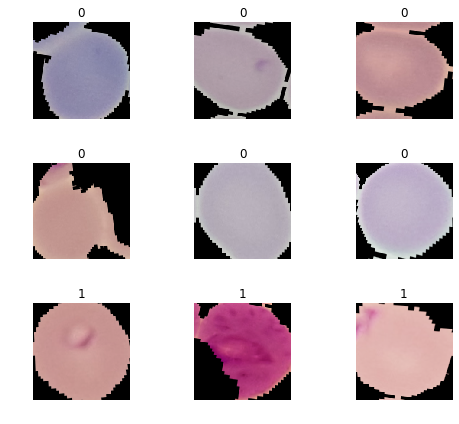

In [6]:
data.show_batch(rows=3,figsize=(7,6))

In [ ]:
data.c

In [7]:
print(data.classes)

[0, 1]


In [8]:
@dataclass
class Fbeta_binary(Callback):
    "Computes the fbeta between preds and targets for single-label classification"
    beta2: int = 2
    eps: float = 1e-9
    clas:int=1
    
    def on_epoch_begin(self, **kwargs):
        self.TP = 0
        self.total_y_pred = 0   
        self.total_y_true = 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        y_pred = last_output.argmax(dim=1)
        y_true = last_target.float()
        
        self.TP += ((y_pred==self.clas) * (y_true==self.clas)).float().sum()
        self.total_y_pred += (y_pred==self.clas).float().sum()
        self.total_y_true += (y_true==self.clas).float().sum()
    
    def on_epoch_end(self, **kwargs):
        beta2=self.beta2**2
        prec = self.TP/(self.total_y_pred+self.eps)
        rec = self.TP/(self.total_y_true+self.eps)       
        res = (prec*rec)/(prec*beta2+rec+self.eps)*(1+beta2)
        self.metric = res

In [ ]:
learn = create_cnn(data,models.resnet101,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])

res=learn.fit_one_cycle(4)

/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/changebio/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [03:00<00:00, 988393.56it/s] 


In [22]:
print(models.resnet18)

<function resnet18 at 0x7efefabdbd90>


In [9]:
learn = create_cnn(data,models.,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])

res=learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


RuntimeError: CUDA out of memory. Tried to allocate 49.00 MiB (GPU 0; 10.91 GiB total capacity; 9.33 GiB already allocated; 64.06 MiB free; 2.74 MiB cached)

In [33]:
gc.collect()

8332

In [20]:
import fastai

In [21]:
fastai.__version__

'1.0.39'

In [17]:
model = models.resnet34(pretrained=True)

In [16]:
model_meta.get(list(model_meta.keys())[0],_default_meta)

NameError: name '_default_meta' is not defined

In [18]:
is_pool_type

NameError: name 'is_pool_type' is not defined

In [ ]:
cnn_

In [34]:
torch.cuda.empty_cache()

In [40]:
learn = None

In [8]:
from learner import model_meta

In [9]:
model_meta

{<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet34(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet50(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet101(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.resnet.resnet152(pretrained=False, **kwargs)>: {'cut': -2,
  'split': <function learner._resnet_split(m:torch.nn.modules.module.Module)>},
 <function torchvision.models.squeezenet.squeezenet1_0(pretrained=False, **kwargs)>: {'cut': -1,
  'split': <function learner._squeezenet_split(m:torch.nn.mod

In [32]:
 torch.cuda.empty_cache()

In [31]:
learn=None

In [30]:
torch.cuda.memory_allocated()

9983465984

In [25]:
torch.cuda.memory_cached()

9920446464

In [10]:
for m in list(model_meta.keys()):
    print(m)#learn = None
    try:
        gc.collect()
        torch.cuda.empty_cache()
        learn = create_cnn(data,m,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])
        learn.fit_one_cycle(4)
    except:
        print('too many parameters')

<function resnet18 at 0x7f3e40812d90>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.269077,0.195104,0.073583,0.926417,0.924791
2,0.167898,0.153549,0.056141,0.943859,0.943167
3,0.164022,0.137536,0.049600,0.950400,0.949209
4,0.162844,0.133997,0.049055,0.950945,0.949476


<function resnet34 at 0x7f3e407a6268>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.251796,0.184913,0.064317,0.935683,0.934420
2,0.176770,0.151530,0.054869,0.945131,0.943783
3,0.159084,0.141054,0.049237,0.950763,0.949127
4,0.144150,0.134013,0.048692,0.951308,0.949662


<function resnet50 at 0x7f3e407a62f0>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.209490,0.174003,0.058140,0.941860,0.941133
2,0.163462,0.142014,0.049782,0.950218,0.948747
3,0.149572,0.125267,0.044876,0.955124,0.954436
4,0.136770,0.124543,0.045422,0.954578,0.953410


<function resnet101 at 0x7f3e407a6378>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.207448,0.163523,0.057776,0.942224,0.941024
2,0.158629,0.131039,0.047965,0.952035,0.951002
3,0.129460,0.118458,0.043786,0.956214,0.954928
4,0.119044,0.118274,0.045058,0.954942,0.953989


<function resnet152 at 0x7f3e407a6400>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


too many parameters
<function squeezenet1_0 at 0x7f3e407a6ae8>


/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.240764,0.185576,0.066679,0.933321,0.931209
2,0.198864,0.168272,0.059775,0.940225,0.938904
3,0.177816,0.165777,0.056323,0.943677,0.941926
4,0.172636,0.152195,0.053052,0.946948,0.945725


<function squeezenet1_1 at 0x7f3e407a6d90>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.236099,0.203213,0.075945,0.924055,0.923639
2,0.197926,0.167969,0.058140,0.941860,0.940498
3,0.186055,0.157919,0.058140,0.941860,0.940165
4,0.185853,0.152803,0.055596,0.944404,0.943375


<function densenet121 at 0x7f3e407b2bf8>


/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.214567,0.163453,0.058140,0.941860,0.941133
2,0.160292,0.134806,0.051417,0.948583,0.947602
3,0.138528,0.118440,0.040516,0.959484,0.958169
4,0.114014,0.111466,0.041243,0.958757,0.957846


<function densenet169 at 0x7f3e407b2c80>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


too many parameters
<function densenet201 at 0x7f3e407b2d08>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


too many parameters
<function densenet161 at 0x7f3e407b2d90>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


too many parameters
<function vgg16_bn at 0x7f3e407a6950>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.215612,0.173071,0.060501,0.939499,0.937512
2,0.171457,0.145687,0.051417,0.948583,0.946674
3,0.149561,0.130391,0.045240,0.954760,0.953571
4,0.139872,0.127989,0.045058,0.954942,0.953955


<function vgg19_bn at 0x7f3e407a6a60>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.229537,0.194588,0.064680,0.935320,0.932576
2,0.181969,0.144102,0.051417,0.948583,0.946874
3,0.159010,0.134236,0.047783,0.952217,0.950703
4,0.144851,0.126015,0.044331,0.955669,0.954341


<function alexnet at 0x7f3e408128c8>


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.256687,0.199350,0.069041,0.930959,0.928866
2,0.219179,0.180004,0.060865,0.939135,0.937207
3,0.203302,0.164370,0.059048,0.940952,0.939445
4,0.191897,0.167034,0.057958,0.942042,0.940563


In [23]:
for m in list(model_meta.keys())[5:]:
    #learn = None
    torch.cuda.empty_cache()
    learn = create_cnn(data,m,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])
    res=learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.226623,0.187498,0.067769,0.932231,0.929715
2,0.215413,0.167546,0.060683,0.939317,0.938399
3,0.174425,0.161622,0.060138,0.939862,0.938373
4,0.181529,0.159999,0.055778,0.944222,0.942905


Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /home/changebio/.torch/models/squeezenet1_1-f364aa15.pth
100%|██████████| 4966400/4966400 [00:03<00:00, 1387441.76it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.235650,0.192989,0.065225,0.934775,0.932251
2,0.181064,0.162079,0.058866,0.941134,0.939303
3,0.182070,0.155746,0.055959,0.944041,0.942857
4,0.176380,0.159411,0.058321,0.941679,0.939008


/home/changebio/anaconda3/envs/fastv1/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.202340,0.157076,0.051054,0.948946,0.947799
2,0.156629,0.136281,0.048874,0.951126,0.950065
3,0.134919,0.122245,0.045422,0.954578,0.953306
4,0.117643,0.115205,0.042696,0.957304,0.956376


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


RuntimeError: CUDA out of memory. Tried to allocate 117.50 MiB (GPU 0; 10.91 GiB total capacity; 9.21 GiB already allocated; 142.06 MiB free; 29.96 MiB cached)

In [13]:
list(model_meta.keys())

[<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet34(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet50(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet101(pretrained=False, **kwargs)>,
 <function torchvision.models.resnet.resnet152(pretrained=False, **kwargs)>,
 <function torchvision.models.squeezenet.squeezenet1_0(pretrained=False, **kwargs)>,
 <function torchvision.models.squeezenet.squeezenet1_1(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet121(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet169(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet201(pretrained=False, **kwargs)>,
 <function torchvision.models.densenet.densenet161(pretrained=False, **kwargs)>,
 <function torchvision.models.vgg.vgg16_bn(pretrained=False, **kwargs)>,
 <function torchvision.models.vgg.vgg19_bn(pretrain

In [17]:
for m in model_meta.keys():
    learn = create_cnn(data,m,metrics = [error_rate,accuracy, Fbeta_binary(beta2=1,clas = 1)])
    res=learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.259443,0.206021,0.074491,0.925509,0.924214
2,0.187036,0.163220,0.058866,0.941134,0.939866
3,0.176926,0.143175,0.051054,0.948946,0.948126
4,0.133450,0.135708,0.049237,0.950763,0.949355


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.246255,0.188738,0.069404,0.930596,0.929364
2,0.172432,0.143756,0.050690,0.949310,0.948074
3,0.153237,0.136594,0.050690,0.949310,0.948016
4,0.141645,0.138862,0.051235,0.948765,0.946893


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary
1,0.214714,0.164862,0.058140,0.941860,0.940454
2,0.165523,0.138334,0.050327,0.949673,0.948484
3,0.135429,0.127762,0.045422,0.954578,0.953428
4,0.129969,0.124768,0.046693,0.953307,0.951864


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/changebio/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [02:39<00:00, 1123626.88it/s]


epoch,train_loss,valid_loss,error_rate,accuracy,fbeta_binary


RuntimeError: CUDA out of memory. Tried to allocate 49.00 MiB (GPU 0; 10.91 GiB total capacity; 5.49 GiB already allocated; 32.81 MiB free; 153.73 MiB cached)

In [12]:
for i in model_type

In [53]:
learn.save('stage-1')

In [54]:
interp = ClassificationInterpretation.from_learner(learn)

In [56]:
losses,idxs = interp.top_losses()
len(data.valid_ds),len(losses),len(idxs)

(5512, 5504, 5504)

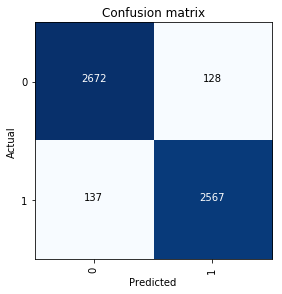

In [58]:
interp.plot_confusion_matrix()

In [59]:
learn.unfreeze()

In [60]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.141186,0.116783,0.039426


In [61]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


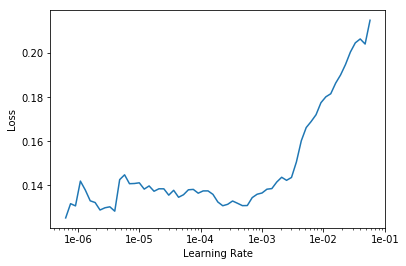

In [62]:
learn.recorder.plot()

In [63]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.118870,0.104693,0.037427
2,0.108816,0.105676,0.039426


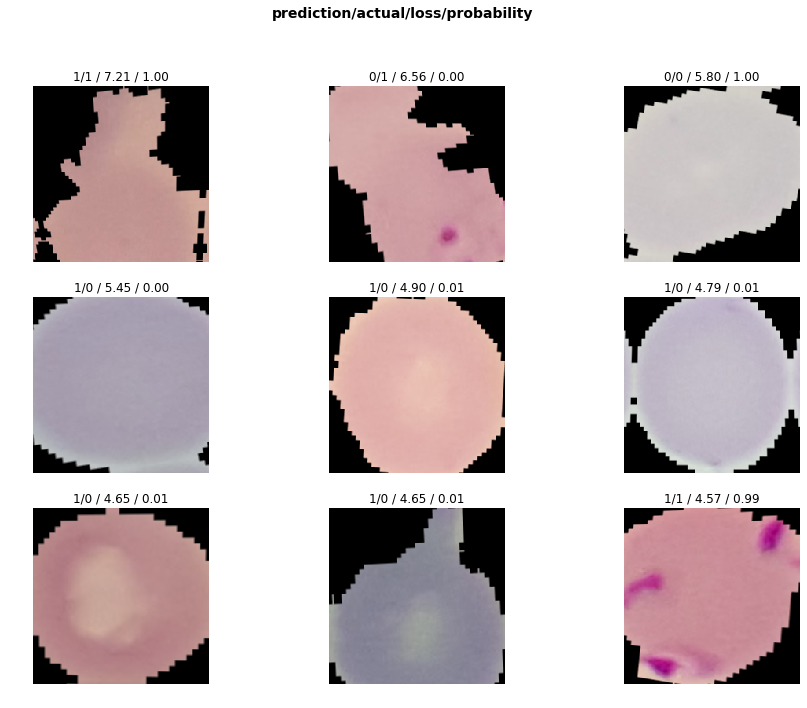

In [57]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
from torch.utils.data.dataset import Dataset
from torchvision import transforms

class MyCustomDataset(Dataset):
    def __init__(self, ..., transforms=None):
        # stuff
        ...
        self.transforms = transforms
        
    def __getitem__(self, index):
        # stuff
        ...
        data = # Some data read from a file or image
        if self.transforms is not None:
            data = self.transforms(data)
        # If the transform variable is not empty
        # then it applies the operations in the transforms with the order that it is created.
        return (img, label)

    def __len__(self):
        return count # of how many data(images?) you have
    
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
])
dataset = ImdbWikiDataset(transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=1)

In [43]:
data.valid_ds

LabelList
y: CategoryList (5512 items)
[Category 0, Category 1, Category 1, Category 0, Category 1]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/test
x: ImageItemList (5512 items)
[Image (3, 103, 145), Image (3, 151, 136), Image (3, 127, 118), Image (3, 148, 127), Image (3, 118, 103)]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/test

In [28]:
?DataLoader

In [24]:
data.valid_ds

LabelList
y: CategoryList (3306 items)
[Category 0, Category 0, Category 0, Category 1, Category 0]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/train
x: ImageItemList (3306 items)
[Image (3, 154, 124), Image (3, 124, 109), Image (3, 127, 112), Image (3, 148, 148), Image (3, 109, 106)]...
Path: ../vision/MalariaCellImages_FlyAI/data/local/train

In [20]:
?ImageDataBunch.from_df